In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("D:\Datasetss\customer_data.csv")

In [7]:
data.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [8]:
data.fillna(method='ffill', inplace=True)

In [9]:
label_encoders = {}
for column in ['gender', 'education', 'region', 'loyalty_status', 'purchase_frequency', 'product_category', 'promotion_usage']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [10]:
numeric_columns = ['age', 'income', 'purchase_amount', 'satisfaction_score']
categorical_columns = ['gender', 'education', 'region', 'loyalty_status', 'purchase_frequency', 'product_category', 'promotion_usage']

In [11]:
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [12]:
data_for_clustering = data.drop(columns=['id']).values

In [13]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    sse.append(kmeans.inertia_)

D:\ana\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ana\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ana\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ana\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_

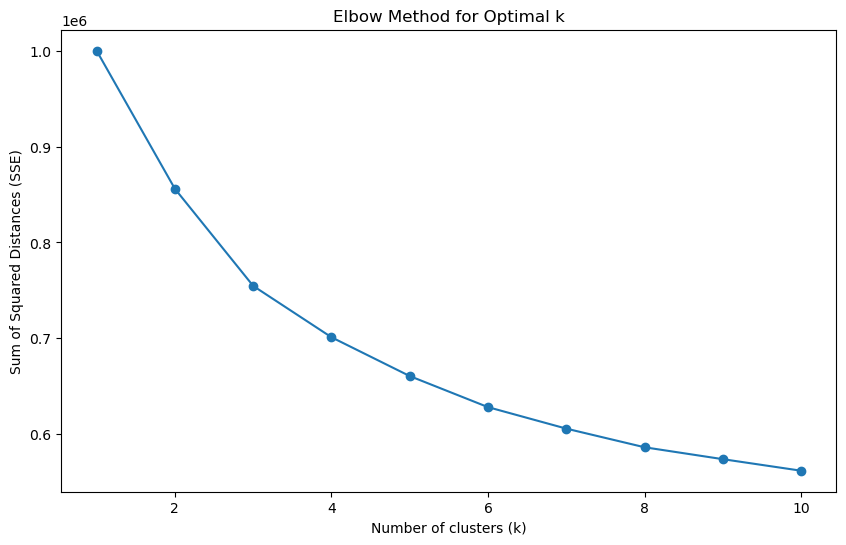

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

In [15]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_for_clustering)

D:\ana\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
data['Cluster'] = clusters

In [17]:
data.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,Cluster
0,1,-0.670294,1,1.013004,0,0,0,0,1.794883,1,0,0.953443,3
1,2,-0.223916,1,-0.938642,3,3,1,2,-1.058024,2,1,0.953443,0
2,3,1.561594,1,0.871969,0,3,2,2,0.455734,2,0,0.953443,3
3,4,-0.000728,1,-1.227100,2,2,1,0,-1.153663,4,0,1.916176,0
4,5,0.222461,0,1.495434,1,1,1,1,2.094092,2,1,-0.009290,3


In [18]:
cluster_summary = data.groupby('Cluster').mean()
cluster_summary

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
Cluster,,,,,,,,,,,,
0,49825.105620,-0.013815,0.497107,-0.726767,1.093232,2.652364,1.209739,1.294526,-0.714147,2.285010,0.301985,-0.006443
1,50211.960060,0.013276,0.497702,-0.721821,1.087138,0.345158,1.195877,1.298432,-0.711027,2.283960,0.296543,-0.004246
2,50004.619926,0.002267,0.499132,0.118250,1.103102,1.495873,1.197655,1.298980,0.094815,4.858382,0.301900,0.004115
3,49969.268658,-0.001358,0.502268,1.040642,1.092207,1.499110,1.199671,1.303774,1.040908,2.153399,0.302329,0.005106


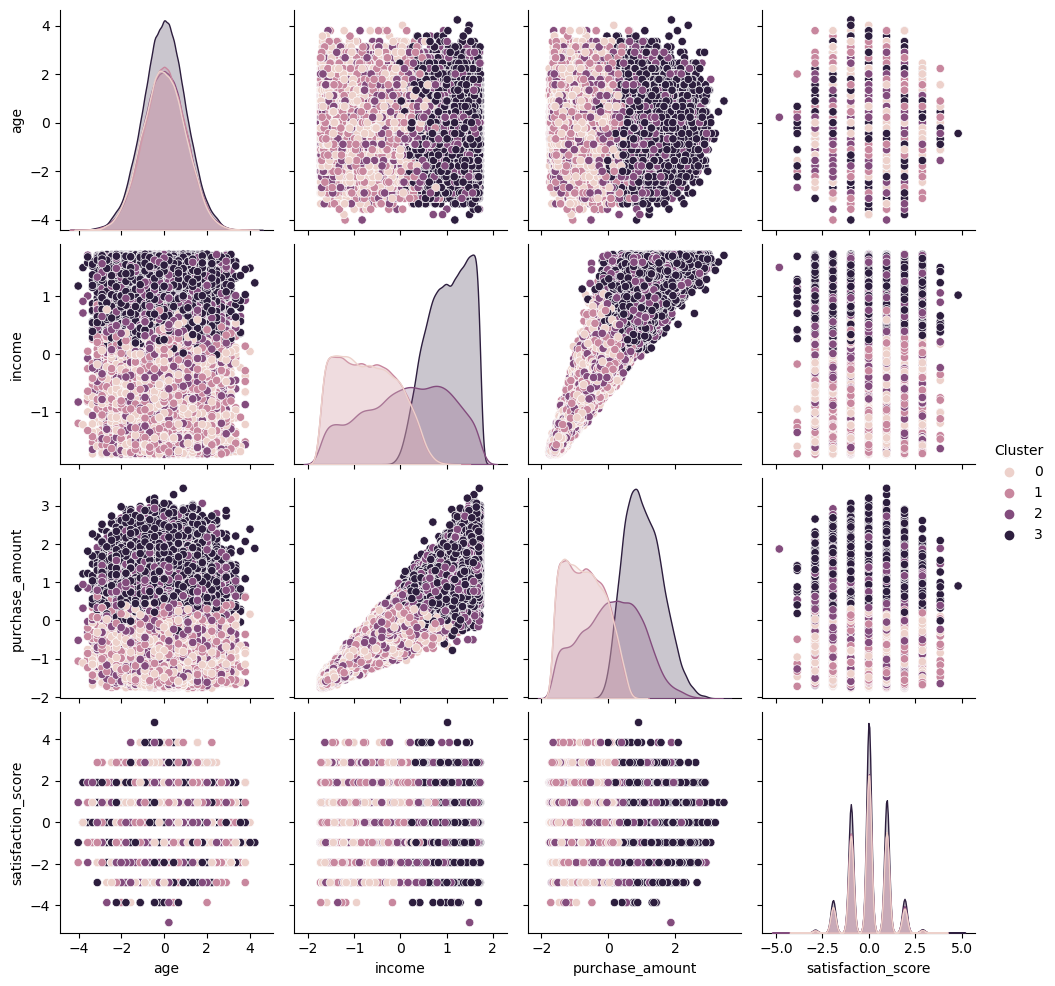

In [19]:
sns.pairplot(data, hue='Cluster', vars=['age', 'income', 'purchase_amount', 'satisfaction_score'])
plt.show()

In [24]:
import os

In [26]:
output_path = 'D:/customer_segmentation/uploads/clustered_customers.csv'
data.to_csv(output_path, index=False)

# Print the location of the saved file
print("File saved to:", os.path.abspath(output_path))

File saved to: D:\demo\uploads\clustered_customers.csv
